In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Dataset to Python environment.

In [2]:
data=pd.read_excel('iriss.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [8]:
# There are no Null Values present inside the Dataset

In [9]:
data.Classification.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Classification, dtype: int64

In [11]:
# There are three unique target column present in the dataset

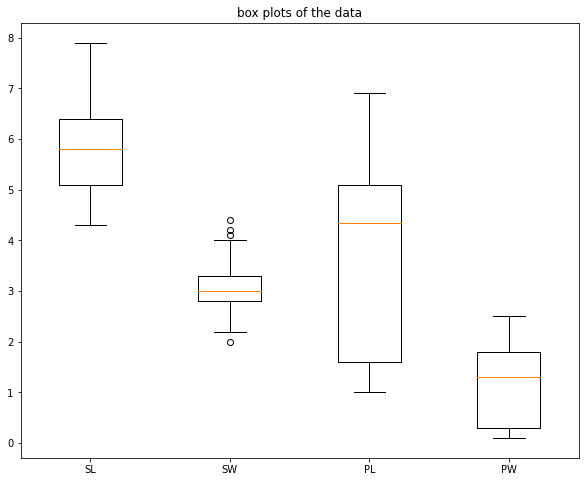

In [12]:
plt.figure(figsize=(10,8))
plt.boxplot(data[['SL', 'SW', 'PL', 'PW']],labels=['SL', 'SW', 'PL', 'PW'])
plt.title('box plots of the data')
plt.show()

In [13]:
# Checking for outliers

In [14]:
q1=np.percentile(data['SW'],25,interpolation='midpoint')
q2=np.percentile(data['SW'],50,interpolation='midpoint')
q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [15]:
iqr=q3-q1
lw=q1-1.5*iqr
up=q3+1.5*iqr

In [16]:
print(lw,up)

2.05 4.05


In [17]:
outlier=[]
for x in data['SW']:
    if((x>up)or(x<lw)):
        outlier.append(x)

In [18]:
outlier

[4.4, 4.1, 4.2, 2.0]

In [19]:
ind=(data['SW']>up)|(data['SW']<lw)
dt=data.loc[ind].index
data.drop(dt,inplace=True)

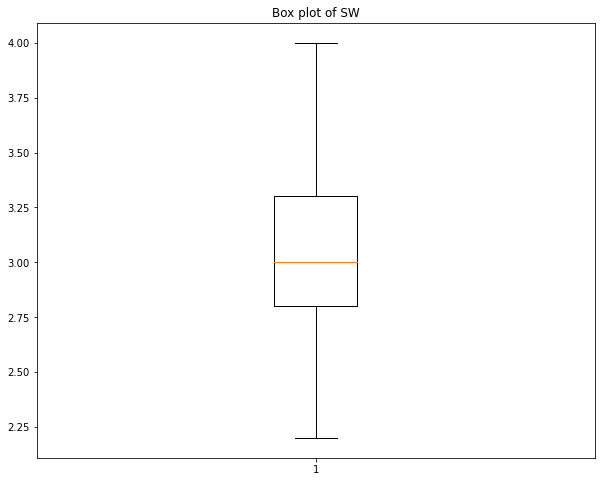

In [20]:
plt.figure(figsize=(10,8))
plt.boxplot(data['SW'])
plt.title('Box plot of SW')
plt.show()

In [21]:
# We have removed the Dataset

In [23]:
# As the target Column is in object type we will do Label Encoding 

In [24]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])

In [25]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Finding out which Classification model will give the best result to predict the Iris Species.

In [26]:
# Splitting the Dataset

In [27]:
x=data.drop(['Classification'],axis=1)
y=pd.DataFrame(data['Classification'])

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
import warnings
warnings.filterwarnings('ignore')

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [37]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9333333333333333
precision score: 0.9249999999999999
recall_score: 0.9249999999999999
f1 score: 0.9249999999999999


In [39]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

## SVM

In [40]:
#linear classifier

In [41]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [42]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9666666666666667
precision score: 0.9696969696969697
recall_score: 0.9583333333333334
f1 score: 0.9619047619047619


## Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [46]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9333333333333333
precision score: 0.9249999999999999
recall_score: 0.9249999999999999
f1 score: 0.9249999999999999


## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,max_depth=10,random_state=42,criterion='entropy')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [49]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9333333333333333
precision score: 0.9249999999999999
recall_score: 0.9249999999999999
f1 score: 0.9249999999999999


## KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

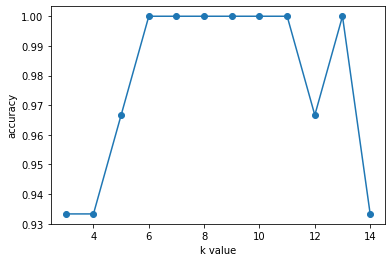

In [51]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [58]:
classifier=KNeighborsClassifier(n_neighbors=9,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [59]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 1.0
precision score: 1.0
recall_score: 1.0
f1 score: 1.0


In [60]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

## From the above models we are getting the highest Accuracy score for the KNN model (taking k value as 9).